In [36]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
data_dict = dict(t='wine', color='red', lang='en', n=100, c='US', a=0, f=1, mp=1)
morewine = []
def getwine(x, datadict):
    for i in range(x):
        datadict['f']=i*100+1
        winedata = requests.get('http://api.snooth.com/wines/?akey=8848wbktav0wzuq5i8n9auajr4tut1xhs68tqvixuh13ldfa', params=data_dict)
        morewine.extend(winedata.json()['wines'])

In [4]:
request = requests.get('http://api.snooth.com/wines/?akey=8848wbktav0wzuq5i8n9auajr4tut1xhs68tqvixuh13ldfa', params=data_dict)

In [5]:
request

<Response [200]>

In [6]:
getwine(100, data_dict)

In [9]:
morewinedf = pd.DataFrame.from_dict(morewine)

In [10]:
morewinedf.shape

(10000, 17)

In [12]:
morewinedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
available        10000 non-null int64
code             10000 non-null object
image            10000 non-null object
link             10000 non-null object
msrp             486 non-null object
name             10000 non-null object
num_merchants    10000 non-null int64
num_reviews      10000 non-null int64
price            10000 non-null object
region           10000 non-null object
snoothrank       10000 non-null object
tags             10000 non-null object
type             10000 non-null object
varietal         10000 non-null object
vintage          10000 non-null object
winery           9998 non-null object
winery_id        10000 non-null object
dtypes: int64(3), object(14)
memory usage: 1.3+ MB


In [15]:
morewinedf.msrp.unique()

array([nan, '32.00', '85.00', '58.00', '30.00', '25.00', '26.00', '23.99',
       '28.00', '42.00', '40.00', '10.99', '17.00', '24.00', '19.00',
       '13.00', '2550.00', '60.00', '75.00', '72.00', '39.00', '25.99',
       '30.99', '14.00', '12.99', '45.00', '29.00', '20.00', '15.99',
       '48.00'], dtype=object)

In [16]:
morewinedf_hist = morewinedf['price'].apply(lambda x: x.replace(',', '')).astype(float).plot.hist(bins=1000, figsize=(15,15))

In [18]:
morewinedf.head()

,available,code,image,link,msrp,name,num_merchants,num_reviews,price,region,snoothrank,tags,type,varietal,vintage,winery,winery_id
0,1,hitching-post-generation-2005,http://ei.isnooth.com/multimedia/a/e/1/image_3...,http://www.snooth.com/wine/hitching-post-gener...,NaN,Hitching Post Generation,112,1,15.99,USA > California > Santa Barbara,n/a,,Red Wine,Cabernet Franc; Merlot; Syrah,2005,Hitching Post,hitching-post
1,1,villa-farnia-di-farnese-montepulciano-dabruzzo...,http://ei.isnooth.com/multimedia/d/5/c/image_7...,http://www.snooth.com/wine/villa-farnia-di-far...,NaN,Villa Farnia di Farnese Montepulciano d'Abruzzo,2,5,20.75,Italy > Abruzzi > Montepulciano d'Abruzzo,2.5,,Red Wine,Montepulciano,2008,Farnese Vini,farnese-vini
2,1,sette-ponti-2007,http://ei.isnooth.com/multimedia/5/9/a/image_9...,http://www.snooth.com/wine/sette-ponti-2007/,NaN,Sette Ponti,2,6,104.99,Italy > Tuscany > Maremma > Maremma Toscana Igt,3.5,,,,2007,Tenuta Sette Ponti,tenuta-sette-ponti
3,1,paracombe-shiraz-adelaide-hills-2001,http://ei.isnooth.com/multimedia/8/2/e/image_2...,http://www.snooth.com/wine/paracombe-shiraz-ad...,NaN,Paracombe Shiraz Adelaide Hills,1,12,69.99,Australia > Adelaide Hills,4,,Red Wine,Syrah,2001,Paracombe,paracombe
4,1,vina-misiones-de-rengo-carmenere-rapel-valley-...,http://ei.isnooth.com/multimedia/7/d/8/image_1...,http://www.snooth.com/wine/vina-misiones-de-re...,NaN,Viña Misiones de Rengo Carménère Rapel Valley ...,1,2,6.99,Chile > Central Valley > Rapel Valley > Rengo,3.5,,Red Wine,Carmenère,2008,Viña Misiones de Rengo,vina-misiones-de-rengo


In [19]:
morewinedf.price.unique()

array(['15.99', '20.75', '104.99', '69.99', '6.99', '10.49', '13.99',
       '29.99', '32.00', '34.99', '55.99', '15.63', '60.14', '70.49',
       '28.89', '6.98', '18.59', '66.95', '26.99', '24.99', '10.99',
       '11.95', '17.99', '16.99', '60.99', '14.95', '7.99', '13.49',
       '8.99', '14.99', '19.95', '12.95', '39.99', '25.79', '13.79',
       '12.99', '13.17', '11.99', '80.09', '22.99', '37.95', '10.89',
       '39.49', '43.99', '286.50', '85.00', '9.99', '58.00', '23.54',
       '28.99', '97.85', '39.89', '66.69', '30.00', '31.29', '52.99',
       '33.99', '27.99', '29.19', '37.29', '88.00', '15.19', '32.99',
       '33.00', '40.00', '46.99', '25.99', '19.99', '44.99', '21.99',
       '17.19', '75.99', '6.49', '55.00', '3.97', '16.29', '33.79',
       '42.89', '34.49', '48.00', '49.99', '24.59', '76.46', '25.00',
       '26.97', '171.10', '50.39', '600.00', '19.39', '67.99', '19.19',
       '34.00', '6.69', '23.67', '25.08', '34.89', '29.95', '6.84',
       '89.99', '15.29', 

In [20]:
morewinedf.price.asint()

AttributeError: 'Series' object has no attribute 'asint'

In [24]:
morewinedf['price'] = morewinedf['price'].str.replace(',', '')
morewinedf['price'] = morewinedf['price'].str.replace('$', '')
morewinedf['price'] = morewinedf['price'].astype(float)

In [25]:
morewinedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
available        10000 non-null int64
code             10000 non-null object
image            10000 non-null object
link             10000 non-null object
msrp             486 non-null object
name             10000 non-null object
num_merchants    10000 non-null int64
num_reviews      10000 non-null int64
price            10000 non-null float64
region           10000 non-null object
snoothrank       10000 non-null object
tags             10000 non-null object
type             10000 non-null object
varietal         10000 non-null object
vintage          10000 non-null object
winery           9998 non-null object
winery_id        10000 non-null object
dtypes: float64(1), int64(3), object(13)
memory usage: 1.3+ MB


In [26]:
morewinedf

,available,code,image,link,msrp,name,num_merchants,num_reviews,price,region,snoothrank,tags,type,varietal,vintage,winery,winery_id
0,1,hitching-post-generation-2005,http://ei.isnooth.com/multimedia/a/e/1/image_3...,http://www.snooth.com/wine/hitching-post-gener...,NaN,Hitching Post Generation,112,1,15.99,USA > California > Santa Barbara,n/a,,Red Wine,Cabernet Franc; Merlot; Syrah,2005,Hitching Post,hitching-post
1,1,villa-farnia-di-farnese-montepulciano-dabruzzo...,http://ei.isnooth.com/multimedia/d/5/c/image_7...,http://www.snooth.com/wine/villa-farnia-di-far...,NaN,Villa Farnia di Farnese Montepulciano d'Abruzzo,2,5,20.75,Italy > Abruzzi > Montepulciano d'Abruzzo,2.5,,Red Wine,Montepulciano,2008,Farnese Vini,farnese-vini
2,1,sette-ponti-2007,http://ei.isnooth.com/multimedia/5/9/a/image_9...,http://www.snooth.com/wine/sette-ponti-2007/,NaN,Sette Ponti,2,6,104.99,Italy > Tuscany > Maremma > Maremma Toscana Igt,3.5,,,,2007,Tenuta Sette Ponti,tenuta-sette-ponti
3,1,paracombe-shiraz-adelaide-hills-2001,http://ei.isnooth.com/multimedia/8/2/e/image_2...,http://www.snooth.com/wine/paracombe-shiraz-ad...,NaN,Paracombe Shiraz Adelaide Hills,1,12,69.99,Australia > Adelaide Hills,4,,Red Wine,Syrah,2001,Paracombe,paracombe
4,1,vina-misiones-de-rengo-carmenere-rapel-valley-...,http://ei.isnooth.com/multimedia/7/d/8/image_1...,http://www.snooth.com/wine/vina-misiones-de-re...,NaN,Viña Misiones de Rengo Carménère Rapel Valley ...,1,2,6.99,Chile > Central Valley > Rapel Valley > Rengo,3.5,,Red Wine,Carmenère,2008,Viña Misiones de Rengo,vina-misiones-de-rengo
5,1,walnut-crest-merlot-valle-rapel-emiliana-2007,http://ei.isnooth.com/multimedia/e/e/d/image_6...,http://www.snooth.com/wine/walnut-crest-merlot...,NaN,Walnut Crest Merlot Valle Rapel Emiliana,1,15,10.49,Chile > Central Valley > Rapel Valley,2.5,,Red Wine,Merlot,2007,Emiliana,emiliana
6,1,castello-monaci-negroamaro-salento-igt-maru-2007,http://ei.isnooth.com/multimedia/1/6/9/image_8...,http://www.snooth.com/wine/castello-monaci-neg...,NaN,Castello Monaci Negroamaro Salento IGT Maru,2,4,13.99,Italy > Puglia > Salice Salentino,3.5,,Red Wine,Negroamaro,2007,Castello Monaci,castello-monaci
7,1,finca-sandoval-syrah-blend-manchuela-cuvee-cec...,http://ei.isnooth.com/multimedia/9/e/a/image_1...,http://www.snooth.com/wine/finca-sandoval-syra...,NaN,Finca Sandoval Syrah Blend Manchuela Cuvée Cec...,1,5,29.99,Spain > Castilla-la Mancha > Manchuela,n/a,,Red Wine,Syrah; Grenache; Bobal,2008,Finca Sandoval,finca-sandoval
8,1,wait-cellars-green-valley-pinot-noir-devoto-ga...,http://ei.isnooth.com/multimedia/f/d/5/image_3...,http://www.snooth.com/wine/wait-cellars-green-...,32.00,Wait Cellars Green Valley Pinot Noir Devoto Ga...,3,0,32.00,USA > California > Sonoma County > Russian Riv...,n/a,,Red Wine,Pinot Noir,2012,Wait Cellars,wait-cellars
9,1,zd-wines-pinot-noir-napa-2008,http://ei.isnooth.com/multimedia/d/7/4/image_1...,http://www.snooth.com/wine/zd-wines-pinot-noir...,NaN,Zd Wines Pinot Noir Napa,1,7,34.99,USA > California > Napa County,2.5,,Red Wine,Pinot Noir,2008,ZD Wines,zd-wines


In [27]:
import missingno

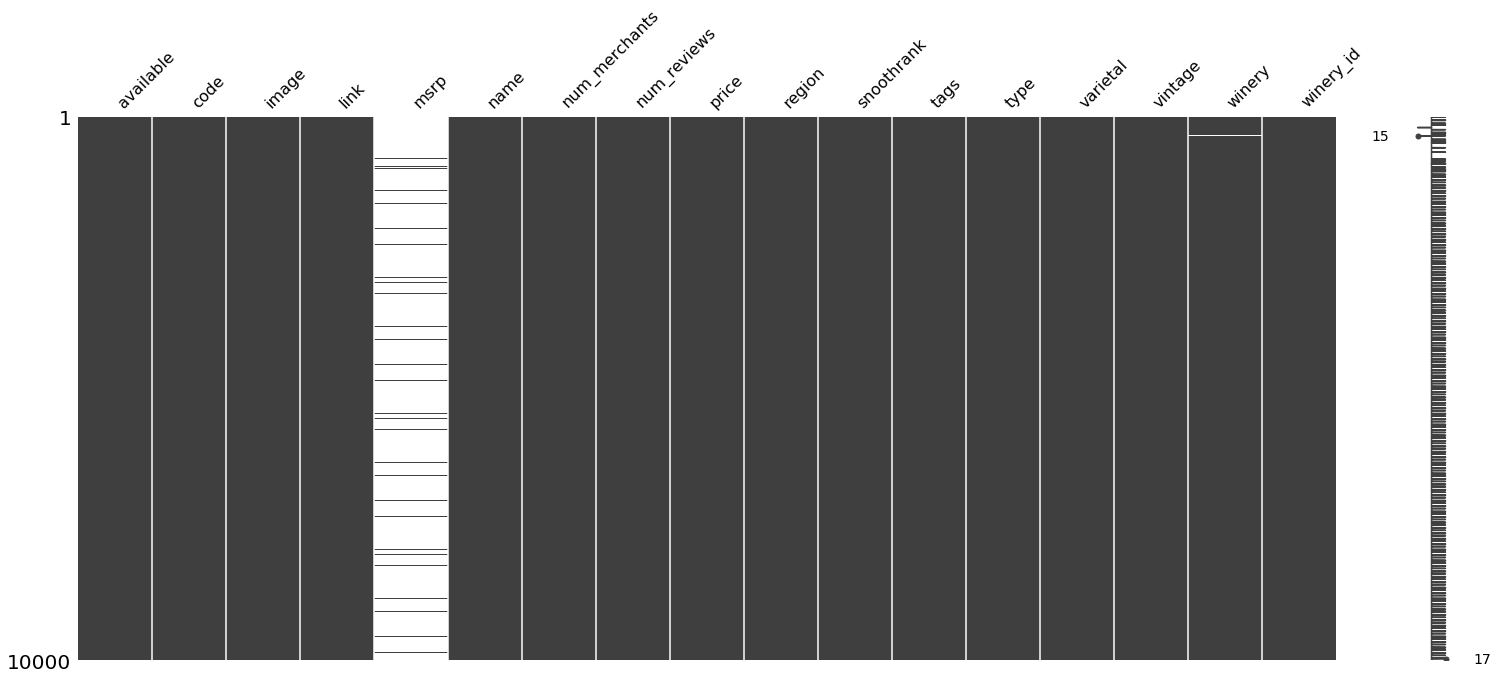

In [28]:
missingno.matrix(morewinedf)

In [29]:
morewinedf.msrp.drop()

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

In [31]:
winedf = morewinedf.drop('msrp', axis=1)

In [32]:
winedf.head(40)

,available,code,image,link,name,num_merchants,num_reviews,price,region,snoothrank,tags,type,varietal,vintage,winery,winery_id
0,1,hitching-post-generation-2005,http://ei.isnooth.com/multimedia/a/e/1/image_3...,http://www.snooth.com/wine/hitching-post-gener...,Hitching Post Generation,112,1,15.99,USA > California > Santa Barbara,n/a,,Red Wine,Cabernet Franc; Merlot; Syrah,2005,Hitching Post,hitching-post
1,1,villa-farnia-di-farnese-montepulciano-dabruzzo...,http://ei.isnooth.com/multimedia/d/5/c/image_7...,http://www.snooth.com/wine/villa-farnia-di-far...,Villa Farnia di Farnese Montepulciano d'Abruzzo,2,5,20.75,Italy > Abruzzi > Montepulciano d'Abruzzo,2.5,,Red Wine,Montepulciano,2008,Farnese Vini,farnese-vini
2,1,sette-ponti-2007,http://ei.isnooth.com/multimedia/5/9/a/image_9...,http://www.snooth.com/wine/sette-ponti-2007/,Sette Ponti,2,6,104.99,Italy > Tuscany > Maremma > Maremma Toscana Igt,3.5,,,,2007,Tenuta Sette Ponti,tenuta-sette-ponti
3,1,paracombe-shiraz-adelaide-hills-2001,http://ei.isnooth.com/multimedia/8/2/e/image_2...,http://www.snooth.com/wine/paracombe-shiraz-ad...,Paracombe Shiraz Adelaide Hills,1,12,69.99,Australia > Adelaide Hills,4,,Red Wine,Syrah,2001,Paracombe,paracombe
4,1,vina-misiones-de-rengo-carmenere-rapel-valley-...,http://ei.isnooth.com/multimedia/7/d/8/image_1...,http://www.snooth.com/wine/vina-misiones-de-re...,Viña Misiones de Rengo Carménère Rapel Valley ...,1,2,6.99,Chile > Central Valley > Rapel Valley > Rengo,3.5,,Red Wine,Carmenère,2008,Viña Misiones de Rengo,vina-misiones-de-rengo
5,1,walnut-crest-merlot-valle-rapel-emiliana-2007,http://ei.isnooth.com/multimedia/e/e/d/image_6...,http://www.snooth.com/wine/walnut-crest-merlot...,Walnut Crest Merlot Valle Rapel Emiliana,1,15,10.49,Chile > Central Valley > Rapel Valley,2.5,,Red Wine,Merlot,2007,Emiliana,emiliana
6,1,castello-monaci-negroamaro-salento-igt-maru-2007,http://ei.isnooth.com/multimedia/1/6/9/image_8...,http://www.snooth.com/wine/castello-monaci-neg...,Castello Monaci Negroamaro Salento IGT Maru,2,4,13.99,Italy > Puglia > Salice Salentino,3.5,,Red Wine,Negroamaro,2007,Castello Monaci,castello-monaci
7,1,finca-sandoval-syrah-blend-manchuela-cuvee-cec...,http://ei.isnooth.com/multimedia/9/e/a/image_1...,http://www.snooth.com/wine/finca-sandoval-syra...,Finca Sandoval Syrah Blend Manchuela Cuvée Cec...,1,5,29.99,Spain > Castilla-la Mancha > Manchuela,n/a,,Red Wine,Syrah; Grenache; Bobal,2008,Finca Sandoval,finca-sandoval
8,1,wait-cellars-green-valley-pinot-noir-devoto-ga...,http://ei.isnooth.com/multimedia/f/d/5/image_3...,http://www.snooth.com/wine/wait-cellars-green-...,Wait Cellars Green Valley Pinot Noir Devoto Ga...,3,0,32.00,USA > California > Sonoma County > Russian Riv...,n/a,,Red Wine,Pinot Noir,2012,Wait Cellars,wait-cellars
9,1,zd-wines-pinot-noir-napa-2008,http://ei.isnooth.com/multimedia/d/7/4/image_1...,http://www.snooth.com/wine/zd-wines-pinot-noir...,Zd Wines Pinot Noir Napa,1,7,34.99,USA > California > Napa County,2.5,,Red Wine,Pinot Noir,2008,ZD Wines,zd-wines


In [34]:
winedf.to_csv('snooth_api_pull.csv')

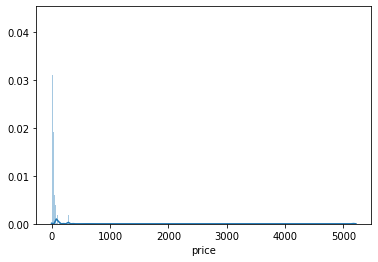

In [40]:
 
sns.distplot(winedf.price, bins=1000,

In [42]:
winedf.head(50)

,available,code,image,link,name,num_merchants,num_reviews,price,region,snoothrank,tags,type,varietal,vintage,winery,winery_id
0,1,hitching-post-generation-2005,http://ei.isnooth.com/multimedia/a/e/1/image_3...,http://www.snooth.com/wine/hitching-post-gener...,Hitching Post Generation,112,1,15.99,USA > California > Santa Barbara,n/a,,Red Wine,Cabernet Franc; Merlot; Syrah,2005,Hitching Post,hitching-post
1,1,villa-farnia-di-farnese-montepulciano-dabruzzo...,http://ei.isnooth.com/multimedia/d/5/c/image_7...,http://www.snooth.com/wine/villa-farnia-di-far...,Villa Farnia di Farnese Montepulciano d'Abruzzo,2,5,20.75,Italy > Abruzzi > Montepulciano d'Abruzzo,2.5,,Red Wine,Montepulciano,2008,Farnese Vini,farnese-vini
2,1,sette-ponti-2007,http://ei.isnooth.com/multimedia/5/9/a/image_9...,http://www.snooth.com/wine/sette-ponti-2007/,Sette Ponti,2,6,104.99,Italy > Tuscany > Maremma > Maremma Toscana Igt,3.5,,,,2007,Tenuta Sette Ponti,tenuta-sette-ponti
3,1,paracombe-shiraz-adelaide-hills-2001,http://ei.isnooth.com/multimedia/8/2/e/image_2...,http://www.snooth.com/wine/paracombe-shiraz-ad...,Paracombe Shiraz Adelaide Hills,1,12,69.99,Australia > Adelaide Hills,4,,Red Wine,Syrah,2001,Paracombe,paracombe
4,1,vina-misiones-de-rengo-carmenere-rapel-valley-...,http://ei.isnooth.com/multimedia/7/d/8/image_1...,http://www.snooth.com/wine/vina-misiones-de-re...,Viña Misiones de Rengo Carménère Rapel Valley ...,1,2,6.99,Chile > Central Valley > Rapel Valley > Rengo,3.5,,Red Wine,Carmenère,2008,Viña Misiones de Rengo,vina-misiones-de-rengo
5,1,walnut-crest-merlot-valle-rapel-emiliana-2007,http://ei.isnooth.com/multimedia/e/e/d/image_6...,http://www.snooth.com/wine/walnut-crest-merlot...,Walnut Crest Merlot Valle Rapel Emiliana,1,15,10.49,Chile > Central Valley > Rapel Valley,2.5,,Red Wine,Merlot,2007,Emiliana,emiliana
6,1,castello-monaci-negroamaro-salento-igt-maru-2007,http://ei.isnooth.com/multimedia/1/6/9/image_8...,http://www.snooth.com/wine/castello-monaci-neg...,Castello Monaci Negroamaro Salento IGT Maru,2,4,13.99,Italy > Puglia > Salice Salentino,3.5,,Red Wine,Negroamaro,2007,Castello Monaci,castello-monaci
7,1,finca-sandoval-syrah-blend-manchuela-cuvee-cec...,http://ei.isnooth.com/multimedia/9/e/a/image_1...,http://www.snooth.com/wine/finca-sandoval-syra...,Finca Sandoval Syrah Blend Manchuela Cuvée Cec...,1,5,29.99,Spain > Castilla-la Mancha > Manchuela,n/a,,Red Wine,Syrah; Grenache; Bobal,2008,Finca Sandoval,finca-sandoval
8,1,wait-cellars-green-valley-pinot-noir-devoto-ga...,http://ei.isnooth.com/multimedia/f/d/5/image_3...,http://www.snooth.com/wine/wait-cellars-green-...,Wait Cellars Green Valley Pinot Noir Devoto Ga...,3,0,32.00,USA > California > Sonoma County > Russian Riv...,n/a,,Red Wine,Pinot Noir,2012,Wait Cellars,wait-cellars
9,1,zd-wines-pinot-noir-napa-2008,http://ei.isnooth.com/multimedia/d/7/4/image_1...,http://www.snooth.com/wine/zd-wines-pinot-noir...,Zd Wines Pinot Noir Napa,1,7,34.99,USA > California > Napa County,2.5,,Red Wine,Pinot Noir,2008,ZD Wines,zd-wines


In [49]:
winedf["type"].unique()

array(['Red Wine', '', 'Sparkling Wine', 'Dessert/Fortified'],
      dtype=object)

In [51]:
winedf.loc[winedf['type'] == ''].count()

available        1292
code             1292
image            1292
link             1292
name             1292
num_merchants    1292
num_reviews      1292
price            1292
region           1292
snoothrank       1292
tags             1292
type             1292
varietal         1292
vintage          1292
winery           1292
winery_id        1292
dtype: int64

In [54]:
winedf.loc[winedf['type'] == 'Sparkling Wine']

,available,code,image,link,name,num_merchants,num_reviews,price,region,snoothrank,tags,type,varietal,vintage,winery,winery_id
206,1,bouvet-brut-rose-nv,http://ei.isnooth.com/multimedia/2/7/2/image_1...,http://www.snooth.com/wine/bouvet-brut-rose-nv/,Bouvet Brut Rose,1,6,18.49,France > Loire,n/a,,Sparkling Wine,Chardonnay; Chenin Blanc,NV,Domaine G. et G. Bouvet,domaine-g-et-g-bouvet
251,1,brut-rose-vintage-2009-1,http://ei.isnooth.com/multimedia/3/3/d/image_1...,http://www.snooth.com/wine/brut-rose-vintage-2...,Brut Rose Vintage,7,2,21.29,South Africa > Western Cape,n/a,,Sparkling Wine,Pinot Noir^chardonnay,2009,Graham Beck,graham-beck
254,1,vina-palo-alto-red-bordeaux-blend-valle-del-ma...,http://ei.isnooth.com/multimedia/8/9/0/image_1...,http://www.snooth.com/wine/vina-palo-alto-red-...,Viña Palo Alto Red Bordeaux Blend Valle del Ma...,113,14,9.99,Chile > Central Valley > Maule Valley,3.5,,Sparkling Wine,Cabernet Sauvignon,2008,Palo Alto,palo-alto
376,1,red-tail-ridge-sparkling-teroldego-2011,http://ei.isnooth.com/multimedia/8/e/4/image_2...,http://www.snooth.com/wine/red-tail-ridge-spar...,Red Tail Ridge Sparkling Teroldego,14,0,35.29,USA > New York > Seneca Lake,n/a,,Sparkling Wine,Teroldego,2011,Red Tail Ridge,red-tail-ridge
490,1,domaine-bernard-morey-et-fils-santenay-vieille...,http://ei.isnooth.com/multimedia/7/3/7/image_1...,http://www.snooth.com/wine/domaine-bernard-mor...,Domaine Bernard Morey et Fils Santenay Vieille...,9,0,29.69,France > Burgundy > Côte d'Or > Côte de Beaune...,n/a,,Sparkling Wine,Pinot Noir,2007,Domaine Bernard Morey et Fils,domaine-bernard-morey-et-fils
659,1,ballatore-red-blend-california-rosso-red-spuma...,http://ei.isnooth.com/multimedia/6/f/b/image_2...,http://www.snooth.com/wine/ballatore-red-blend...,Ballatore Red Blend California Rosso Red Spumante,1,7,7.79,USA > California,3,,Sparkling Wine,Champagne,1975,Ballatore,ballatore
701,1,martini-and-rossi-prosecco-marca-trevigiana-ig...,http://ei.isnooth.com/multimedia/0/4/2/image_7...,http://www.snooth.com/wine/martini-and-rossi-p...,Martini & Rossi Prosecco Marca Trevigiana IGT,2,8,17.99,Italy > Veneto > Marca Trevigiana Igt,2.5,,Sparkling Wine,Prosecco,NV,Martini & Rossi,martini-and-rossi
876,1,san-giuseppe-sparkling-demi-sec-red,http://ei.isnooth.com/multimedia/9/d/4/image_3...,http://www.snooth.com/wine/san-giuseppe-sparkl...,San Giuseppe Sparkling Demi Sec Red,9,0,17.99,Italy > Lambrusco di Sorbara,n/a,,Sparkling Wine,,,Azienda Agricola San Giuseppe,azienda-agricola-san-giuseppe


In [67]:
winedf.varietal.unique()

array([' '], dtype=object)

/Users/stuartmurphy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
winedf['varietal'] = winedf['varietal'].str.replace('^', ' ')

In [65]:
winedf.head()

,available,code,image,link,name,num_merchants,num_reviews,price,region,snoothrank,tags,type,varietal,vintage,winery,winery_id
0,1,hitching-post-generation-2005,http://ei.isnooth.com/multimedia/a/e/1/image_3...,http://www.snooth.com/wine/hitching-post-gener...,Hitching Post Generation,112,1,15.99,USA > California > Santa Barbara,n/a,,Red Wine,,2005,Hitching Post,hitching-post
1,1,villa-farnia-di-farnese-montepulciano-dabruzzo...,http://ei.isnooth.com/multimedia/d/5/c/image_7...,http://www.snooth.com/wine/villa-farnia-di-far...,Villa Farnia di Farnese Montepulciano d'Abruzzo,2,5,20.75,Italy > Abruzzi > Montepulciano d'Abruzzo,2.5,,Red Wine,,2008,Farnese Vini,farnese-vini
2,1,sette-ponti-2007,http://ei.isnooth.com/multimedia/5/9/a/image_9...,http://www.snooth.com/wine/sette-ponti-2007/,Sette Ponti,2,6,104.99,Italy > Tuscany > Maremma > Maremma Toscana Igt,3.5,,,,2007,Tenuta Sette Ponti,tenuta-sette-ponti
3,1,paracombe-shiraz-adelaide-hills-2001,http://ei.isnooth.com/multimedia/8/2/e/image_2...,http://www.snooth.com/wine/paracombe-shiraz-ad...,Paracombe Shiraz Adelaide Hills,1,12,69.99,Australia > Adelaide Hills,4,,Red Wine,,2001,Paracombe,paracombe
4,1,vina-misiones-de-rengo-carmenere-rapel-valley-...,http://ei.isnooth.com/multimedia/7/d/8/image_1...,http://www.snooth.com/wine/vina-misiones-de-re...,Viña Misiones de Rengo Carménère Rapel Valley ...,1,2,6.99,Chile > Central Valley > Rapel Valley > Rengo,3.5,,Red Wine,,2008,Viña Misiones de Rengo,vina-misiones-de-rengo


In [ ]:
morewinedf